# データ結合：Merge
　Pandasを用いて, データを結合する.

## Import

In [1]:
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

## Setting

In [2]:
# Path
input_path = "../input_data/"

# Figure Size
plt.rcParams["figure.figsize"] = (15.0, 10.0)

# Set Display Max Columns
pd.set_option("display.max_columns", 50)

## Read Data

In [3]:
train = pd.read_csv(input_path + "jleague/train.csv", sep=",", header=0, quotechar="\"")
test = pd.read_csv(input_path + "jleague/test.csv", sep=",", header=0, quotechar="\"")
condition = pd.read_csv(input_path + "jleague/condition.csv", sep=",", header=0, quotechar="\"")
stadium = pd.read_csv(input_path + "jleague/stadium.csv", sep=",", header=0, quotechar="\"")

## Check Data

In [4]:
train.dtypes

id          int64
y           int64
year        int64
stage      object
match      object
gameday    object
time       object
home       object
away       object
stadium    object
tv         object
dtype: object

In [5]:
train.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌


In [6]:
test.dtypes

id          int64
year        int64
stage      object
match      object
gameday    object
time       object
home       object
away       object
stadium    object
tv         object
dtype: object

In [7]:
test.head()

,id,year,stage,match,gameday,time,home,away,stadium,tv
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉
3,15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス
4,15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス


In [8]:
condition.dtypes

id               int64
home_score       int64
away_score       int64
weather         object
temperature    float64
humidity        object
referee         object
home_team       object
home_01         object
home_02         object
home_03         object
home_04         object
home_05         object
home_06         object
home_07         object
home_08         object
home_09         object
home_10         object
home_11         object
away_team       object
away_01         object
away_02         object
away_03         object
away_04         object
away_05         object
away_06         object
away_07         object
away_08         object
away_09         object
away_10         object
away_11         object
dtype: object

In [9]:
condition.head()

,id,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


In [10]:
stadium.dtypes

name       object
address    object
capa        int64
dtype: object

In [27]:
stadium.sort_values(by="capa",ascending=False).head()

,name,address,capa
17,日産スタジアム,神奈川県横浜市港北区小机町3300,72327
33,埼玉スタジアム２００２,埼玉県さいたま市緑区中野田500,63700
42,国立競技場,東京都新宿区霞ヶ丘町10,54224
36,エコパスタジアム,静岡県袋井市愛野2300-1,50889
9,エディオンスタジアム広島,広島県広島市安佐南区大塚西5-1-1,50000


## Overview(trainのみ)

In [12]:
# 欠損有無
train.isnull().any()

id         False
y          False
year       False
stage      False
match      False
gameday    False
time       False
home       False
away       False
stadium    False
tv         False
dtype: bool

In [13]:
train["stage"].value_counts()

stage
Ｊ２    1046
Ｊ１     675
Name: count, dtype: int64

In [14]:
train["home"].value_counts()

home
愛媛ＦＣ           51
ロアッソ熊本         51
栃木ＳＣ           50
松本山雅ＦＣ         49
モンテディオ山形       49
ＦＣ岐阜           48
アビスパ福岡         48
徳島ヴォルティス       48
ジェフユナイテッド千葉    47
水戸ホーリーホック      47
ファジアーノ岡山       47
湘南ベルマーレ        46
京都サンガF.C.      46
コンサドーレ札幌       46
カターレ富山         45
横浜ＦＣ           45
東京ヴェルディ        44
ジュビロ磐田         43
ギラヴァンツ北九州      43
大分トリニータ        43
ヴァンフォーレ甲府      42
ヴィッセル神戸        41
柏レイソル          41
ガンバ大阪          40
浦和レッズ          40
ベガルタ仙台         39
川崎フロンターレ       39
清水エスパルス        39
セレッソ大阪         39
ＦＣ東京           38
アルビレックス新潟      37
サンフレッチェ広島      37
横浜Ｆ・マリノス       36
サガン鳥栖          36
大宮アルディージャ      36
鹿島アントラーズ       36
名古屋グランパス       35
ガイナーレ鳥取        35
ザスパクサツ群馬       28
Ｖ・ファーレン長崎      27
ＦＣ町田ゼルビア       18
ザスパ草津          17
カマタマーレ讃岐        9
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='Count'>

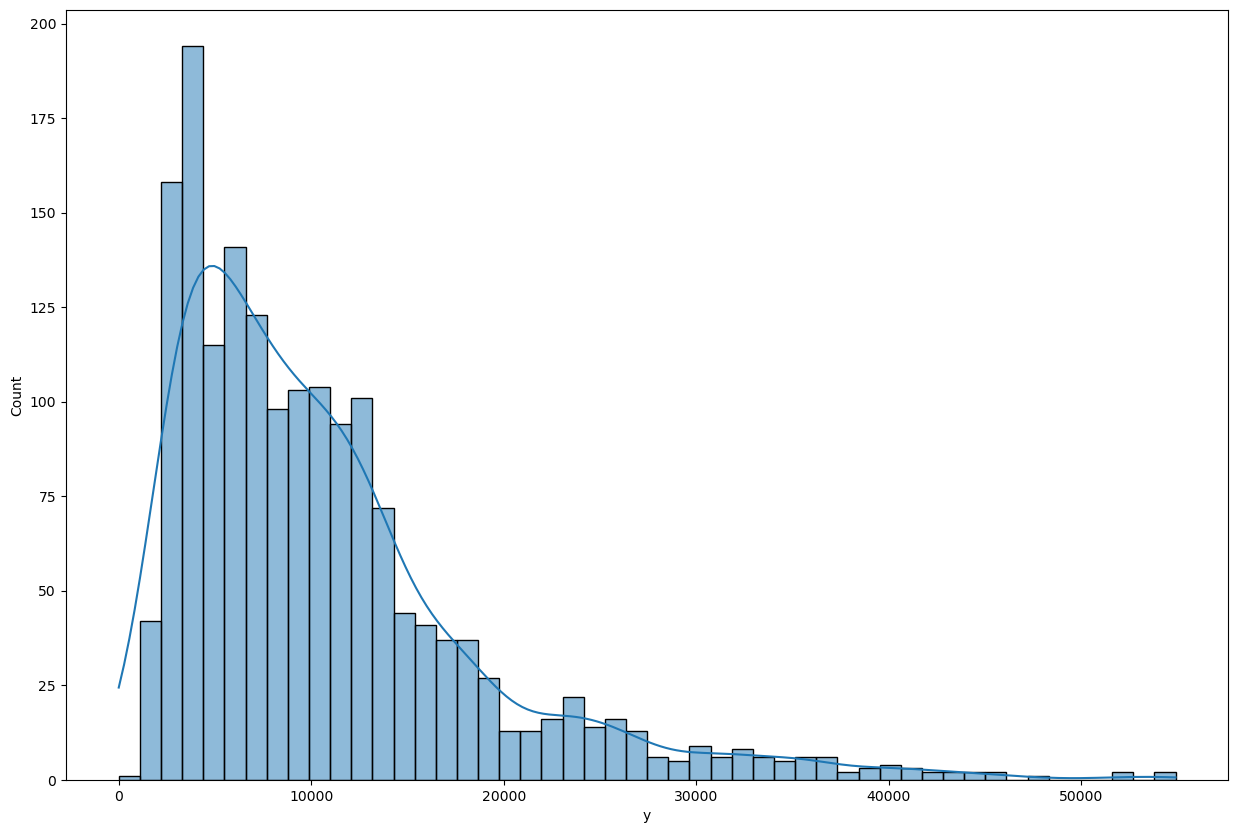

In [25]:
sns.histplot(
    train["y"],    # データ
    kde = True,      # 近似密度関数の表示有無
    bins = 50        # 変数の刻み数
) 

In [18]:
train["y"].quantile([0.01,0.05, 0.25, 0.5, 0.75, 0.95])

0.01     1817.8
0.05     2607.0
0.25     4750.0
0.50     8650.0
0.75    13431.0
0.95    26897.0
Name: y, dtype: float64

In [26]:
train.sort_values(by="y",ascending=False).head(10)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
942,15134,54905,2013,Ｊ１,第３４節第１日,12/07(土),15:34,浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉
1463,15787,54350,2014,Ｊ１,第１４節第１日,05/17(土),14:04,浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合
693,14852,52293,2013,Ｊ１,第２節第１日,03/09(土),16:05,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉（録）
270,14292,51879,2012,Ｊ１,第３４節第１日,12/01(土),15:34,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＢＳ－ＴＢＳ／テレ玉
895,15084,47790,2013,Ｊ１,第２８節第１日,10/05(土),16:05,浦和レッズ,大宮アルディージャ,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉（録）
208,14224,46046,2012,Ｊ１,第２６節第１日,09/22(土・祝),16:04,浦和レッズ,ガンバ大阪,埼玉スタジアム２００２,スカパー／ｅ２／スカパー光
925,15116,45607,2013,Ｊ１,第３２節第１日,11/23(土・祝),14:04,浦和レッズ,川崎フロンターレ,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉
74,14071,44422,2012,Ｊ１,第９節第１日,05/03(木・祝),19:05,浦和レッズ,横浜Ｆ・マリノス,埼玉スタジアム２００２,スカパー／ｅ２／スカパー光／ＮＨＫ ＢＳ１／テレ玉
177,14186,44131,2012,Ｊ１,第２２節第１日,08/18(土),19:04,浦和レッズ,鹿島アントラーズ,埼玉スタジアム２００２,スカパー／ｅ２／スカパー光／ＮＨＫ ＢＳ１／テレ玉
1438,15759,43564,2014,Ｊ１,第１１節第１日,05/03(土・祝),16:04,浦和レッズ,ＦＣ東京,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス


In [79]:
train.groupby("stadium").agg(ymax=("y","max"),ymin=("y","min"),count=("stadium","count")).reset_index()\
.merge(stadium[["name","capa"]],left_on='stadium', right_on='name',how="outer").fillna(0)\
.assign(stadium=lambda x:x["name"])\
.drop("name",axis=1)\
.assign(ypercent=lambda x: x["ymax"]/x["capa"]).sort_values("ypercent",ascending=False)\
#.query("count == 1")["name"].to_list()

,stadium,ymax,ymin,count,capa,ypercent
30,山梨中銀スタジアム,16643.0,6161.0,39.0,17000,0.979000
48,豊田スタジアム,38966.0,12075.0,20.0,40000,0.974150
15,ユアテックスタジアム仙台,18863.0,11144.0,38.0,19694,0.957804
35,日立柏サッカー場,14623.0,7013.0,37.0,15349,0.952701
12,ベストアメニティスタジアム,23277.0,6292.0,33.0,24490,0.950470
13,ヤマハスタジアム（磐田）,14389.0,5698.0,40.0,15165,0.948830
21,名古屋市瑞穂陸上競技場,18560.0,7959.0,15.0,20000,0.928000
17,万博記念競技場,19393.0,6559.0,40.0,21000,0.923476
6,シティライトスタジアム,18269.0,5576.0,46.0,20000,0.913450
58,Ｓｈｏｎａｎ ＢＭＷスタジアム平塚,13786.0,3602.0,46.0,15100,0.912980


In [146]:
train.assign(tv_n=lambda x: x["tv"].str.split("／").str.len())\
.query("tv_n < 2")
#.groupby("tv_n").agg(ymean=("y","mean"),ymin=("y","min"),ymax=("y","max"))

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,tv_n
627,14693,3986,2012,Ｊ２,第３６節第２日,10/01(月),19:04,湘南ベルマーレ,ロアッソ熊本,Ｓｈｏｎａｎ ＢＭＷスタジアム平塚,スカパー！,1
628,14694,6061,2012,Ｊ２,第３６節第３日,10/18(木),19:03,松本山雅ＦＣ,ＦＣ岐阜,松本平広域公園総合球技場,スカパー！,1
629,14695,2372,2012,Ｊ２,第３６節第４日,10/25(木),19:04,徳島ヴォルティス,京都サンガF.C.,鳴門・大塚スポーツパーク ポカリスエットスタジアム,スカパー！,1


## データ結合
### train, testとcondition, stadium

In [147]:
# 結合前の行, 列数
print(train.shape)
print(test.shape)

(1721, 11)
(313, 10)


In [148]:
# condition
train_new = pd.merge(train, condition, how="inner", on="id")
test_new = pd.merge(test, condition, how="inner", on="id")

# stadium
train_new = pd.merge(train_new, stadium, how="inner", left_on="stadium", right_on="name")
test_new = pd.merge(test_new, stadium, how="inner", left_on="stadium", right_on="name")

In [149]:
# 結合後の行, 列数
print(train_new.shape)
print(test_new.shape)

(1721, 44)
(313, 43)


## Output

In [151]:
# Train
train_new.to_csv(
    "../output_data/train_new_20251007.csv",  sep=",", index=False, header=True)

# Test
test_new.to_csv(
    "../output_data/test_new_20251007.csv",  sep=",", index=False, header=True)

## DONE!!